Initial Data shape: (2774, 77)
Data shape after cleaning: (2774, 76)


/var/folders/z_/4z9sq5vj56x3v28p4l02_t_w0000gn/T/ipykernel_71839/2089914466.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='nearest', inplace=True)


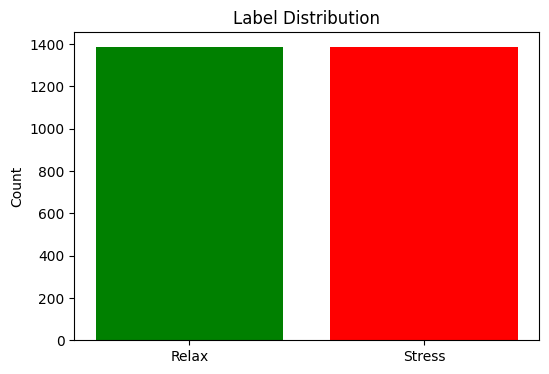

Number of features before selection: 74
Number of features after selection: 35


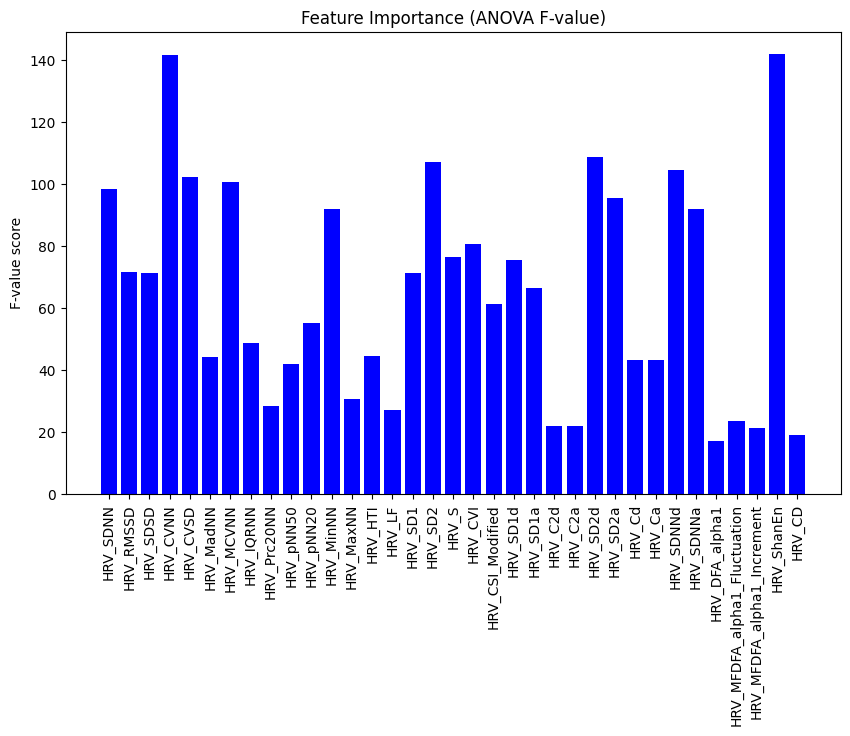

In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Define the path to the data folder
Folder = 'PPG_W60000_O55000'
data_path = f"./Data/{Folder}/data_processed.csv"

# Load the dataset (selected features)
data = pd.read_csv(data_path , index_col=False)

# Basic data overview to understand the structure and size of the dataset
print("Initial Data shape:", data.shape)

# Handle missing values and infinite values:
# - Replace infinite values with NaN to ensure correct handling
# - Drop columns with more than 10 missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(thresh=len(data)-10, axis=1, inplace=True)

# Interpolate remaining missing values using the nearest method
data.interpolate(method='nearest', inplace=True)

# Recheck data shape after preprocessing
print("Data shape after cleaning:", data.shape)

# Plot distribution of labels in the dataset
plt.figure(figsize=(6,4))
plt.bar(['Relax', 'Stress'], data['Labels'].value_counts(), color=['green', 'red'])
plt.title('Label Distribution')
plt.ylabel('Count')
plt.show()

# Separate the features and target variable (labels)
X = data.drop(columns=['Labels', 'Subject_id'])  # Features
y = data['Labels']  # Target variable (Labels)

# Feature selection using ANOVA F-value (SelectKBest)
# Select top 35 features based on their ANOVA F-value score
selector = SelectKBest(f_classif, k=35)
X_kbest = selector.fit_transform(X, y)

# Get the selected features and their corresponding scores
selected_columns = selector.get_support(indices=True)
selected_features = X.columns[selected_columns]
print('Number of features before selection:', X.shape[1])
print('Number of features after selection:', X_kbest.shape[1])

# Create a new DataFrame with selected features and append the 'Labels' and 'Subject_id' back
selected_data = pd.concat([data['Subject_id'], data[selected_features], data['Labels']], axis=1)

# Plot feature importance (ANOVA F-values)
plt.figure(figsize=(10,6))
plt.bar(selected_features, selector.scores_[selected_columns], color='blue')
plt.xticks(rotation=90)
plt.title('Feature Importance (ANOVA F-value)')
plt.ylabel('F-value score')
plt.show()


In [2]:
len(data['Subject_id'].unique())

19

In [3]:
from traditional import SVM, RandomForest, AdaBoost_DecisionTree, Adaboost_SVC, NeuralNetwork, LinearDiscriminant, SGD, KNN

In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from VAE import getUsersEmbedding

embedding_df = getUsersEmbedding()
# Merge the embeddings with the original data (assuming 'Subject_id' is present in both datasets)
final_data = pd.merge(data, embedding_df, on='Subject_id', how='left')

# Step 7: Prepare the data for training and testing

# Features that do not need normalization
#non_normalize_cols = ['Gender', 'Age', 'experience video_game', 'experience VR', 'use stimulants']

# Function to split and process the data, ensuring specific columns are not normalized
def split_train_test_by_subject(X, Y, subject_id):
    """
    Split data for Leave-One-Subject-Out cross-validation.
    """

    X_test = X[X['Subject_id'] == subject_id].copy()
    y_test = Y[Y['Subject_id'] == subject_id].copy()
    X_train = X[X['Subject_id'] != subject_id].copy()
    y_train = Y[Y['Subject_id'] != subject_id].copy()

    # Drop 'Subject_id' column
    X_train.drop(columns='Subject_id', inplace=True)
    X_test.drop(columns='Subject_id', inplace=True)
    
    # Drop 'Subject_id' from labels if necessary
    y_train.drop(columns='Subject_id', errors='ignore', inplace=True)
    y_test.drop(columns='Subject_id', errors='ignore', inplace=True)


    # Normalize features using StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)  # Fit scaler to training data
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Map 'Relax' and 'Stress' to 0 and 1
    label_mapping = {'Relax': 0, 'Stress': 1}
    y_train = y_train['Labels'].map(label_mapping)
    y_test = y_test['Labels'].map(label_mapping)
 
    return X_train, y_train, X_test, y_test


Epoch 1, Loss: 3.4921847690235484
Epoch 2, Loss: 3.4671299782666294
Epoch 3, Loss: 3.373449618166143
Epoch 4, Loss: 3.396844495426525
Epoch 5, Loss: 3.3928867795250635
Epoch 6, Loss: 3.3972571221264927
Epoch 7, Loss: 3.3381321213462134
Epoch 8, Loss: 3.364327820864591
Epoch 9, Loss: 3.3057973276485098
Epoch 10, Loss: 3.317338965155862
Epoch 11, Loss: 3.3941928798502143
Epoch 12, Loss: 3.293980370868336
Epoch 13, Loss: 3.3213750665838067
Epoch 14, Loss: 3.365402492609891
Epoch 15, Loss: 3.3613376942547886
Epoch 16, Loss: 3.3656589551405474
Epoch 17, Loss: 3.3031562024896797
Epoch 18, Loss: 3.3501919507980347
Epoch 19, Loss: 3.3181966976685957
Epoch 20, Loss: 3.36016367782246
Epoch 21, Loss: 3.2780094796961006
Epoch 22, Loss: 3.3158216909928755
Epoch 23, Loss: 3.277826114134355
Epoch 24, Loss: 3.2086826237765225
Epoch 25, Loss: 3.3017235452478584
Epoch 26, Loss: 3.287807334553112
Epoch 27, Loss: 3.2862247228622437
Epoch 28, Loss: 3.3058892596851694
Epoch 29, Loss: 3.2618860223076562
Epoc

In [7]:
data = final_data #if we want to add the embedding

In [8]:
data

,Subject_id,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,...,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,Labels,embed_0,embed_1,embed_2
0,1,60.247424,997.508475,102.913819,113.109270,114.020128,0.103171,0.113392,1013.0,97.8516,...,0.921359,0.997622,2.001946,1.920874,2.406595,0.997058,Relax,0.927617,-0.069372,-0.063025
1,1,58.973925,1021.500000,93.363701,120.184507,120.990951,0.091399,0.117655,1020.5,84.5082,...,0.998577,1.020278,1.905954,1.989866,2.496287,1.110996,Relax,0.927617,-0.069372,-0.063025
2,1,58.263071,1031.107143,83.767791,109.462904,110.363107,0.081241,0.106161,1024.0,79.3191,...,1.059351,1.087113,1.873355,1.990815,2.540458,0.933325,Relax,0.927617,-0.069372,-0.063025
3,1,57.850081,1038.660714,81.148635,107.457053,108.384100,0.078128,0.103457,1036.0,71.9061,...,0.953642,1.098612,1.915360,1.987429,3.035715,1.037028,Relax,0.927617,-0.069372,-0.063025
4,1,58.022821,1033.210526,87.279873,110.402996,111.359019,0.084474,0.106854,1030.0,71.1648,...,1.163408,1.265898,1.852858,1.963127,2.866978,1.023314,Relax,0.927617,-0.069372,-0.063025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,27,80.223816,752.833333,132.427919,194.974024,196.221980,0.175906,0.258987,753.0,92.6625,...,0.993672,1.039837,1.393465,1.998345,4.901584,1.208731,Stress,0.891002,-0.062809,-0.025571
2770,27,80.465200,751.884615,123.716893,188.744175,189.925488,0.164542,0.251028,753.0,92.6625,...,0.927342,0.996305,1.455952,1.978675,3.753023,1.208731,Stress,0.891002,-0.062809,-0.025571
2771,27,81.439949,742.620253,120.834099,186.087380,187.253417,0.162713,0.250582,738.0,84.5082,...,1.081414,1.234783,1.624039,1.951102,3.190889,1.276715,Stress,0.891002,-0.062809,-0.025571
2772,27,80.924061,746.582278,126.984817,198.293909,199.561189,0.170088,0.265602,753.0,96.3690,...,1.088018,1.295554,1.606916,1.966125,4.675308,1.196920,Stress,0.891002,-0.062809,-0.025571


In [9]:
import numpy as np

# List of classifiers to use for training and evaluation
classifier_functions = [SVM, RandomForest, AdaBoost_DecisionTree, NeuralNetwork, LinearDiscriminant, SGD, KNN]

# Initialize dictionaries to store accuracy and F1-score for each classifier
accuracy = {func.__name__: [] for func in classifier_functions}
accuracy_train = {func.__name__: [] for func in classifier_functions}
f_scores = {func.__name__: [] for func in classifier_functions}

# Prepare feature data (X) and label data (Y)
X = data.drop(columns=['Labels'])  # Feature set without labels
Y = data[['Subject_id', 'Labels']]  # Labels including Subject_id for cross-validation

# Get unique subject IDs for "Leave-One-Subject-Out" cross-validation
subject_ids = data['Subject_id'].unique()

# Loop over each subject to perform "Leave-One-Subject-Out" cross-validation
for subject_id in subject_ids:
    print(f'****Processing Subject ID: {subject_id}')
    
    # Split the dataset into training and testing based on the subject ID
    X_train, y_train, X_test, y_test = split_train_test_by_subject(X, Y, subject_id)

    # Loop through all classifiers
    for classifier in classifier_functions:
        classifier_name = classifier.__name__
        print(f'Running classifier: {classifier_name}')
        
        try:
            # Run classifier and get F1-score and accuracy for test and train sets
            f_score, acc_test, acc_train = classifier(X_train, y_train, X_test, y_test)
            
            # Store results
            accuracy[classifier_name].append(acc_test)
            accuracy_train[classifier_name].append(acc_train)
            f_scores[classifier_name].append(f_score)

            print("Acc test: ", acc_test)
        
        except Exception as e:
            # Handle any errors during classifier execution
            print(f'Error with classifier {classifier_name}: {e}')
            accuracy[classifier_name].append(None)
            accuracy_train[classifier_name].append(None)
            f_scores[classifier_name].append(None)

# After loop: summarize the results
print('Final results:')

# Print average F1-scores for each classifier
for classifier in classifier_functions:
    classifier_name = classifier.__name__
    avg_f1_score = np.mean([score for score in f_scores[classifier_name] if score is not None])
    print(f'{classifier_name}: Average F1-score: {avg_f1_score}')

# Print average accuracy for test and train sets
for classifier in classifier_functions:
    classifier_name = classifier.__name__
    avg_acc_test = np.mean([acc for acc in accuracy[classifier_name] if acc is not None])
    avg_acc_train = np.mean([acc for acc in accuracy_train[classifier_name] if acc is not None])
    print(f'{classifier_name}: Average Test Accuracy: {avg_acc_test}, Average Train Accuracy: {avg_acc_train}')


****Processing Subject ID: 1
Running classifier: SVM
Acc test:  0.4726027397260274
Running classifier: RandomForest
Acc test:  0.4178082191780822
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.4315068493150685
Running classifier: NeuralNetwork
Acc test:  0.4589041095890411
Running classifier: LinearDiscriminant
Acc test:  0.4383561643835616
Running classifier: SGD
Acc test:  0.541095890410959
Running classifier: KNN
Acc test:  0.6027397260273972
****Processing Subject ID: 2
Running classifier: SVM
Acc test:  0.8287671232876712
Running classifier: RandomForest
Acc test:  0.8767123287671232
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.8082191780821918
Running classifier: NeuralNetwork
Acc test:  0.7876712328767124
Running classifier: LinearDiscriminant
Acc test:  0.7465753424657534
Running classifier: SGD
Acc test:  0.6643835616438356
Running classifier: KNN
Acc test:  0.6506849315068494
****Processing Subject ID: 3
Running classifier: SVM
Acc test:  0.6917808219178082
Running classifier: RandomForest
Acc test:  0.7945205479452054
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.541095890410959
Running classifier: NeuralNetwork
Acc test:  0.6917808219178082
Running classifier: LinearDiscriminant
Acc test:  0.7191780821917808
Running classifier: SGD
Acc test:  0.8013698630136986
Running classifier: KNN
Acc test:  0.7054794520547946
****Processing Subject ID: 6
Running classifier: SVM
Acc test:  0.4520547945205479
Running classifier: RandomForest
Acc test:  0.4863013698630137
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.4589041095890411
Running classifier: NeuralNetwork
Acc test:  0.5205479452054794
Running classifier: LinearDiscriminant
Acc test:  0.4931506849315068
Running classifier: SGD
Acc test:  0.4452054794520548
Running classifier: KNN
Acc test:  0.4452054794520548
****Processing Subject ID: 7
Running classifier: SVM
Acc test:  0.541095890410959
Running classifier: RandomForest
Acc test:  0.5136986301369864
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5958904109589042
Running classifier: NeuralNetwork
Acc test:  0.4794520547945205
Running classifier: LinearDiscriminant
Acc test:  0.4931506849315068
Running classifier: SGD
Acc test:  0.5273972602739726
Running classifier: KNN
Acc test:  0.5205479452054794
****Processing Subject ID: 8
Running classifier: SVM
Acc test:  0.4178082191780822
Running classifier: RandomForest
Acc test:  0.3972602739726027
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5616438356164384
Running classifier: NeuralNetwork
Acc test:  0.5616438356164384
Running classifier: LinearDiscriminant
Acc test:  0.3972602739726027
Running classifier: SGD
Acc test:  0.4863013698630137
Running classifier: KNN
Acc test:  0.5136986301369864
****Processing Subject ID: 9
Running classifier: SVM
Acc test:  0.6575342465753424
Running classifier: RandomForest
Acc test:  0.5068493150684932
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5
Running classifier: NeuralNetwork
Acc test:  0.3424657534246575
Running classifier: LinearDiscriminant
Acc test:  0.6232876712328768
Running classifier: SGD
Acc test:  0.5136986301369864
Running classifier: KNN
Acc test:  0.636986301369863
****Processing Subject ID: 10
Running classifier: SVM
Acc test:  0.4863013698630137
Running classifier: RandomForest
Acc test:  0.4657534246575342
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.3904109589041096
Running classifier: NeuralNetwork
Acc test:  0.4520547945205479
Running classifier: LinearDiscriminant
Acc test:  0.4794520547945205
Running classifier: SGD
Acc test:  0.5
Running classifier: KNN
Acc test:  0.410958904109589
****Processing Subject ID: 12
Running classifier: SVM
Acc test:  0.4589041095890411
Running classifier: RandomForest
Acc test:  0.4863013698630137
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.410958904109589
Running classifier: NeuralNetwork
Acc test:  0.5205479452054794
Running classifier: LinearDiscriminant
Acc test:  0.4931506849315068
Running classifier: SGD
Acc test:  0.3904109589041096
Running classifier: KNN
Acc test:  0.4794520547945205
****Processing Subject ID: 13
Running classifier: SVM
Acc test:  0.5
Running classifier: RandomForest
Acc test:  0.5
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5136986301369864
Running classifier: NeuralNetwork
Acc test:  0.8013698630136986
Running classifier: LinearDiscriminant
Acc test:  0.5
Running classifier: SGD
Acc test:  0.5
Running classifier: KNN
Acc test:  0.4931506849315068
****Processing Subject ID: 14
Running classifier: SVM
Acc test:  0.4589041095890411
Running classifier: RandomForest
Acc test:  0.589041095890411
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5958904109589042
Running classifier: NeuralNetwork
Acc test:  0.5273972602739726
Running classifier: LinearDiscriminant
Acc test:  0.4657534246575342
Running classifier: SGD
Acc test:  0.4794520547945205
Running classifier: KNN
Acc test:  0.5821917808219178
****Processing Subject ID: 15
Running classifier: SVM
Acc test:  0.8013698630136986
Running classifier: RandomForest
Acc test:  0.8424657534246576
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.821917808219178
Running classifier: NeuralNetwork
Acc test:  0.8356164383561644
Running classifier: LinearDiscriminant
Acc test:  0.7602739726027398
Running classifier: SGD
Acc test:  0.7191780821917808
Running classifier: KNN
Acc test:  0.815068493150685
****Processing Subject ID: 18
Running classifier: SVM
Acc test:  0.5205479452054794
Running classifier: RandomForest
Acc test:  0.5
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5
Running classifier: NeuralNetwork
Acc test:  0.547945205479452
Running classifier: LinearDiscriminant
Acc test:  0.5136986301369864
Running classifier: SGD
Acc test:  0.5205479452054794
Running classifier: KNN
Acc test:  0.5
****Processing Subject ID: 21
Running classifier: SVM
Acc test:  0.5068493150684932
Running classifier: RandomForest
Acc test:  0.363013698630137
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.4041095890410959
Running classifier: NeuralNetwork
Acc test:  0.3904109589041096
Running classifier: LinearDiscriminant
Acc test:  0.4383561643835616
Running classifier: SGD
Acc test:  0.5
Running classifier: KNN
Acc test:  0.3356164383561644
****Processing Subject ID: 23
Running classifier: SVM
Acc test:  0.6301369863013698
Running classifier: RandomForest
Acc test:  0.5068493150684932
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5273972602739726
Running classifier: NeuralNetwork
Acc test:  0.5684931506849316
Running classifier: LinearDiscriminant
Acc test:  0.6095890410958904
Running classifier: SGD
Acc test:  0.3561643835616438
Running classifier: KNN
Acc test:  0.6095890410958904
****Processing Subject ID: 24
Running classifier: SVM
Acc test:  0.6095890410958904
Running classifier: RandomForest
Acc test:  0.5068493150684932
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.4383561643835616
Running classifier: NeuralNetwork
Acc test:  0.5136986301369864
Running classifier: LinearDiscriminant
Acc test:  0.5821917808219178
Running classifier: SGD
Acc test:  0.5958904109589042
Running classifier: KNN
Acc test:  0.4863013698630137
****Processing Subject ID: 25
Running classifier: SVM
Acc test:  0.5684931506849316
Running classifier: RandomForest
Acc test:  0.6575342465753424
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5136986301369864
Running classifier: NeuralNetwork
Acc test:  0.678082191780822
Running classifier: LinearDiscriminant
Acc test:  0.6164383561643836
Running classifier: SGD
Acc test:  0.5205479452054794
Running classifier: KNN
Acc test:  0.6232876712328768
****Processing Subject ID: 26
Running classifier: SVM
Acc test:  0.547945205479452
Running classifier: RandomForest
Acc test:  0.5958904109589042
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.5547945205479452
Running classifier: NeuralNetwork
Acc test:  0.5684931506849316
Running classifier: LinearDiscriminant
Acc test:  0.5273972602739726
Running classifier: SGD
Acc test:  0.5
Running classifier: KNN
Acc test:  0.5616438356164384
****Processing Subject ID: 27
Running classifier: SVM
Acc test:  0.3493150684931507
Running classifier: RandomForest
Acc test:  0.3219178082191781
Running classifier: AdaBoost_DecisionTree


/Users/atharmahmoudinejad/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc test:  0.7054794520547946
Running classifier: NeuralNetwork
Acc test:  0.3904109589041096
Running classifier: LinearDiscriminant
Acc test:  0.3493150684931507
Running classifier: SGD
Acc test:  0.2671232876712329
Running classifier: KNN
Acc test:  0.3972602739726027
Final results:
SVM: Average F1-score: 0.4572143083864692
RandomForest: Average F1-score: 0.4461509227270075
AdaBoost_DecisionTree: Average F1-score: 0.4756155260912761
NeuralNetwork: Average F1-score: 0.4854182144516052
LinearDiscriminant: Average F1-score: 0.4409618318139547
SGD: Average F1-score: 0.3629927346835737
KNN: Average F1-score: 0.3857694158557307
SVM: Average Test Accuracy: 0.5526315789473685, Average Train Accuracy: 0.7300528719057918
RandomForest: Average Test Accuracy: 0.5436193222782985, Average Train Accuracy: 0.9992389649923895
AdaBoost_DecisionTree: Average Test Accuracy: 0.5407354001441961, Average Train Accuracy: 0.7349194905070896
NeuralNetwork: Average Test Accuracy: 0.5598413842826243, Average Tr

In [10]:
# After processing all subjects, summarize the results
print("Final results (averaged across all subjects):\n")

# Calculate and print average F1-scores, test accuracy, and train accuracy for each classifier
for classifier in classifier_functions:
    classifier_name = classifier.__name__
    
    # Calculate average F1-score, test accuracy, and train accuracy, ignoring None values
    avg_f1_score = np.mean([score for score in f_scores[classifier_name] if score is not None])
    avg_acc_test = np.mean([acc for acc in accuracy[classifier_name] if acc is not None])
    avg_acc_train = np.mean([acc for acc in accuracy_train[classifier_name] if acc is not None])
    
    # Print the average results for the classifier
    print(f'{classifier_name}:\n'
          f'  Average F1-score: {avg_f1_score:.4f}\n'
          f'  Average Test Accuracy: {avg_acc_test:.4f}\n'
          f'  Average Train Accuracy: {avg_acc_train:.4f}\n')


Final results (averaged across all subjects):

SVM:
  Average F1-score: 0.4572
  Average Test Accuracy: 0.5526
  Average Train Accuracy: 0.7301

RandomForest:
  Average F1-score: 0.4462
  Average Test Accuracy: 0.5436
  Average Train Accuracy: 0.9992

AdaBoost_DecisionTree:
  Average F1-score: 0.4756
  Average Test Accuracy: 0.5407
  Average Train Accuracy: 0.7349

NeuralNetwork:
  Average F1-score: 0.4854
  Average Test Accuracy: 0.5598
  Average Train Accuracy: 1.0000

LinearDiscriminant:
  Average F1-score: 0.4410
  Average Test Accuracy: 0.5393
  Average Train Accuracy: 0.7206

SGD:
  Average F1-score: 0.3630
  Average Test Accuracy: 0.5173
  Average Train Accuracy: 0.6595

KNN:
  Average F1-score: 0.3858
  Average Test Accuracy: 0.5458
  Average Train Accuracy: 0.8709

